In [46]:
import scipy.stats
from sigvisa.models.wiggles.wavelets import construct_full_basis_implicit, construct_full_basis
from sigvisa.ssms_c import ARSSM, CompactSupportSSM, TransientCombinedSSM
import pyublas


In [138]:
basis = construct_full_basis_implicit(5.0, "db4_2.0_3_30.0")
start_idxs, end_idxs, identities, basis_prototypes, _ = basis

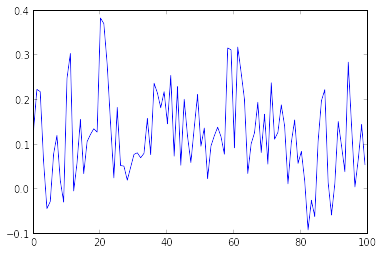

In [139]:
noise_arssm = ARSSM(np.array((0.3, -0.1, 0.2, 0.1, -0.05, 0.1, -0.05, 0.03, -0.01, 0.01), dtype=np.float), 0.01, 0.0, 0.1)
noise_sample = noise_arssm.prior_sample(100, 0)
plot(noise_sample)

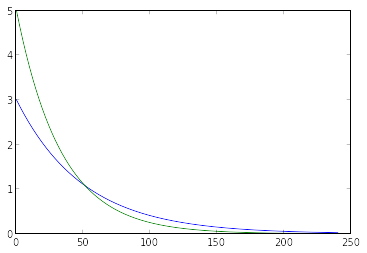

In [140]:
x1 = np.linspace(0, 240, 1200)
t1 = np.exp(-0.02*x1)*3
t2 = np.exp(-0.03*x1)*5
plot(x1, t1)
plot(x1, t2)

In [141]:
npts = 6000
n_basis = len(start_idxs)

components = [(noise_arssm, 0, npts, None)]

prior_means1 = np.zeros((n_basis,), dtype=np.float)
prior_vars1 = np.ones((n_basis,), dtype=np.float) 
prior_vars1[identities==0] = 1.0
prior_vars1[identities==1] = 0.01
prior_vars1[identities>1] = 0.0001
prior_vars1 *= 5


cssm1 = CompactSupportSSM(start_idxs, end_idxs, identities, basis_prototypes, prior_means1, prior_vars1, 0.0, 0.0)
components.append((cssm1, 4000, len(t1), t1))
#components.append((None, 4000, len(t1), t1))

prior_means2 = np.zeros((n_basis,), dtype=np.float)
prior_vars2 = np.ones((n_basis,), dtype=np.float) *.2
cssm2 = CompactSupportSSM(start_idxs, end_idxs, identities, basis_prototypes, prior_means2, prior_vars2, 0.0, 0.0)
components.append((cssm2, 4500, len(t2), t2))
#components.append((None, 4500, len(t2), t2))

tssm = TransientCombinedSSM(components, 1e-6)

/home/dmoore/.virtualenvs/sigvisa/lib/python2.7/site-packages/IPython/kernel/__main__.py:24: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


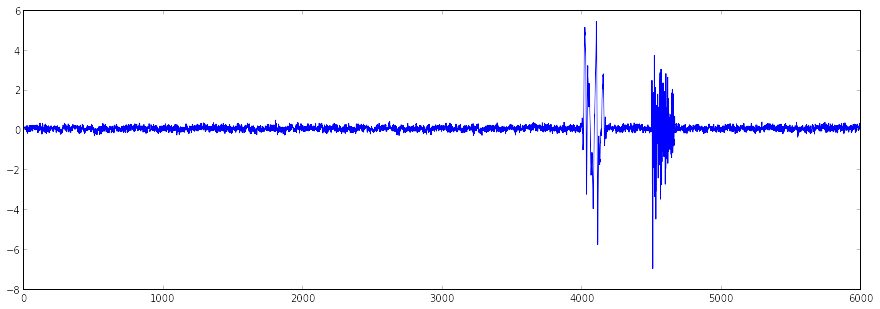

In [142]:
s = tssm.prior_sample(6000, 0)
f = plt.figure(figsize=(15, 5))
plot(s)

In [137]:
lp = tssm.run_filter(s)
print lp

4741.38481605
